In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path = untar_data(URLs.PETS); path

HBox(children=(IntProgress(value=0, max=811706944), HTML(value='')))

PosixPath('/home/edwin/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

['images', 'annotations']

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/edwin/.fastai/data/oxford-iiit-pet/images/english_setter_191.jpg'),
 PosixPath('/home/edwin/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_25.jpg'),
 PosixPath('/home/edwin/.fastai/data/oxford-iiit-pet/images/Sphynx_103.jpg'),
 PosixPath('/home/edwin/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_55.jpg'),
 PosixPath('/home/edwin/.fastai/data/oxford-iiit-pet/images/english_setter_149.jpg')]

In [8]:
np.random.seed(3)
pat = r'/([^/]+)_\d+.jpg$'

In [9]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)

In [10]:
data.normalize(imagenet_stats)

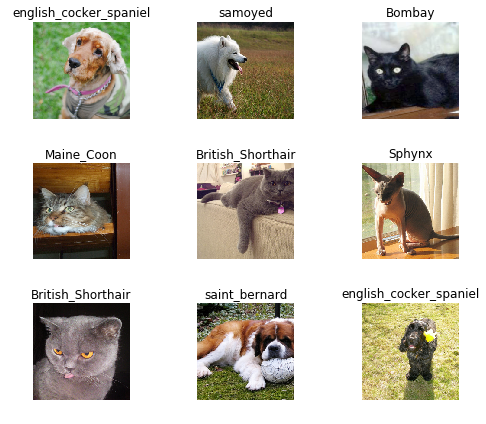

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [13]:
print(data.classes)

['english_setter', 'miniature_pinscher', 'Sphynx', 'japanese_chin', 'english_cocker_spaniel', 'Maine_Coon', 'scottish_terrier', 'pug', 'leonberger', 'wheaten_terrier', 'american_pit_bull_terrier', 'american_bulldog', 'staffordshire_bull_terrier', 'havanese', 'keeshond', 'beagle', 'Russian_Blue', 'great_pyrenees', 'basset_hound', 'newfoundland', 'german_shorthaired', 'Ragdoll', 'shiba_inu', 'Abyssinian', 'samoyed', 'Persian', 'British_Shorthair', 'chihuahua', 'Bengal', 'pomeranian', 'saint_bernard', 'Birman', 'Siamese', 'boxer', 'Bombay', 'yorkshire_terrier', 'Egyptian_Mau']


In [14]:
len(data.classes), data.c

(37, 37)

In [15]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [16]:
learn.fit_one_cycle(4)

VBox(children=(HBox(children=(IntProgress(value=0, max=4), HTML(value='0.00% [0/4 00:00<00:00]'))), HTML(value='epoch  train loss  valid loss  error_rate<p>')))

Total time: 3:26:54
epoch  train loss  valid loss  error_rate
1      1.166980    0.314425    0.093897    (51:34)
2      0.518055    0.257557    0.081154    (51:54)
3      0.334098    0.224010    0.081824    (51:43)
4      0.242125    0.211159    0.071764    (51:41)



In [19]:
learn.save('stage1.pth')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

HBox(children=(IntProgress(value=0, max=12), HTML(value='')))

HBox(children=(IntProgress(value=0, max=12), HTML(value='0.00% [0/12 00:00<00:00]')))

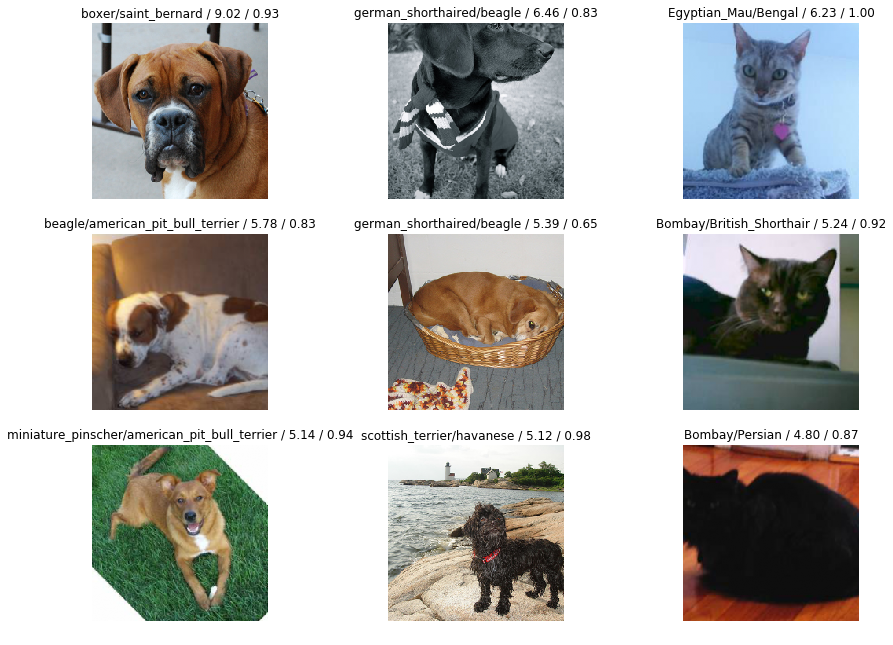

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

In [23]:
doc(interp.plot_top_losses)

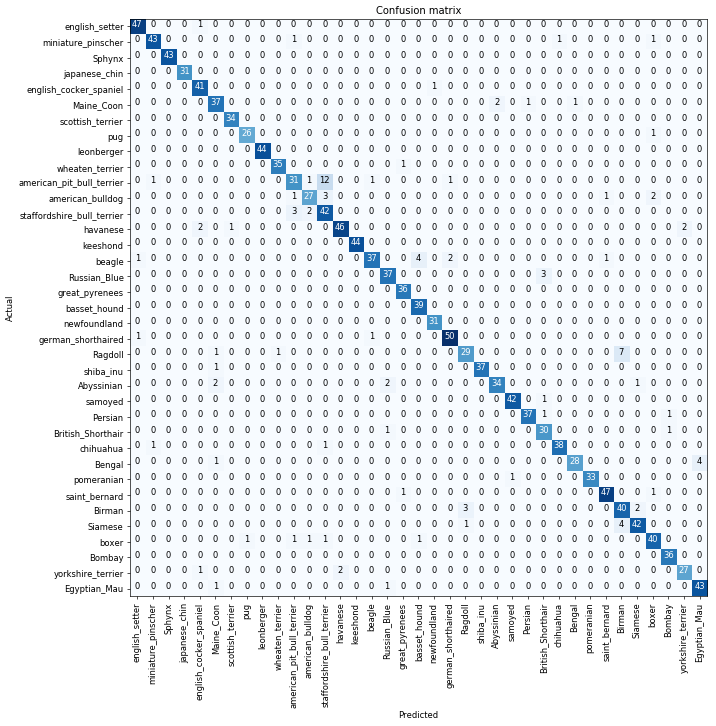

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)